In [49]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import scipy
from scipy.stats import spearmanr

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

import sklearn
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import preprocessing

In [50]:
data = 'training_fname-lname-dob-similarities_Aggregate_strength(1-5000).csv'
users = pd.read_csv(data)
users.head()

,maciek2552,maciek2552.1,5/5/1991,maciek2552.2,100,100.1,20,73.33333333,0
0,money3,money3,12/31/1969,money3,100.0,100.0,12.500000,70.833333,0
1,money6,money6,2/21/1986,money6,100.0,100.0,12.500000,70.833333,0
2,money7,money7,2/24/1957,money7,100.0,100.0,12.500000,70.833333,0
3,wwide2008,wwide2008,1/1/1983,wwide2008,100.0,100.0,10.526316,70.175439,0
4,jmamian,jmamian,2/26/1981,jmamian,100.0,100.0,0.000000,66.666667,0


In [51]:
users.columns = ['firstname','lastname','dob','password',
                'firstname_similarity','lastname_similarity',
                'dob_similarity','aggregate_similarity',
                'strength_aggregate']
users.head()


,firstname,lastname,dob,password,firstname_similarity,lastname_similarity,dob_similarity,aggregate_similarity,strength_aggregate
0,money3,money3,12/31/1969,money3,100.0,100.0,12.500000,70.833333,0
1,money6,money6,2/21/1986,money6,100.0,100.0,12.500000,70.833333,0
2,money7,money7,2/24/1957,money7,100.0,100.0,12.500000,70.833333,0
3,wwide2008,wwide2008,1/1/1983,wwide2008,100.0,100.0,10.526316,70.175439,0
4,jmamian,jmamian,2/26/1981,jmamian,100.0,100.0,0.000000,66.666667,0


In [52]:
user_data = users.ix[:,(4,5,6,7)].values # selects features (independent vars fname similarity,lname similarity,dob similarity,aggregate password similarity)
user_data_names = ['firstname_similarity','lastname_similarity',
                  'dob_similarity','aggregate_similarity'] #names the above features
y = users.ix[:,8].values #our target variable (password strength)
#Please note that using .ix will throw a deprecation warning, it should still work fine however

C:\Users\Axiom\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
C:\Users\Axiom\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


In [53]:
users.isnull().sum() #just checks to make sure there is no null vals
#should return all 0's


firstname               0
lastname                0
dob                     0
password                0
firstname_similarity    0
lastname_similarity     0
dob_similarity          0
aggregate_similarity    0
strength_aggregate      0
dtype: int64

In [54]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 9 columns):
firstname               4999 non-null object
lastname                4999 non-null object
dob                     4999 non-null object
password                4999 non-null object
firstname_similarity    4999 non-null float64
lastname_similarity     4999 non-null float64
dob_similarity          4999 non-null float64
aggregate_similarity    4999 non-null float64
strength_aggregate      4999 non-null int64
dtypes: float64(4), int64(1), object(4)
memory usage: 351.6+ KB


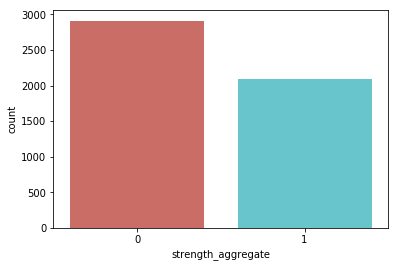

In [55]:
sb.countplot(x='strength_aggregate',data=users,palette='hls') 
#check distribution of the data. 0's are bad 1's are good 
# as of 3/21 we have about a 40/60 split of 0's and 1's respectively 

In [56]:
X = scale(user_data) #scales data so all attributes are of same scale 
#throws out data that is of magnitudes greater than the other data in the set 
#essentially removes outliers

#lab_enc = preprocessing.LabelEncoder()
#encoded = lab_enc.fit_transform(y) 

# the above is needd because for whatever reason the 1's and 0's
# of the training score are being interpreted as floats

In [57]:
LogReg = LogisticRegression()
LogReg.fit(user_data,y)
LogReg.score(X,y)


C:\Users\Axiom\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.4176835367073415

In [58]:
y_pred = LogReg.predict(X) #given the features, what would this algorithm predict
from sklearn.metrics import classification_report # the way to display that classification
print(classification_report(y,y_pred)) # will print the actual value (good or bad) next to what the algorithm thinks

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2911
           1       0.42      1.00      0.59      2088

   micro avg       0.42      0.42      0.42      4999
   macro avg       0.21      0.50      0.29      4999
weighted avg       0.17      0.42      0.25      4999



C:\Users\Axiom\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Axiom\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Axiom\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [59]:
user_data2 = users.ix[:,(4,5)].values # selects features (independent vars fname,lname)
user_data_names2 = ['firstname_similarity','lastname_similarity'] #names the above features

C:\Users\Axiom\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [60]:
x2 =  scale(user_data2)
#lab_enc = preprocessing.LabelEncoder()
y2 = users.ix[:,8].values

C:\Users\Axiom\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


In [61]:
LogReg2 = LogisticRegression()
LogReg2.fit(x2,y2)
LogReg2.score(x2,y2)

C:\Users\Axiom\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7483496699339868

In [62]:
y_pred = LogReg2.predict(x2) #given the features, what would this algorithm predict
from sklearn.metrics import classification_report # the way to display that classification
print(classification_report(y2,y_pred)) # will print the actual value (good or bad) next to what the algorithm thinks

              precision    recall  f1-score   support

           0       0.77      0.81      0.79      2911
           1       0.71      0.66      0.69      2088

   micro avg       0.75      0.75      0.75      4999
   macro avg       0.74      0.74      0.74      4999
weighted avg       0.75      0.75      0.75      4999



In [63]:
user_data3 = users.ix[:,(4,5,6)].values # selects features (independent vars fname,lname,dob)
user_data_names3 = ['firstname_similarity','lastname_similarity','dob_similarity'] #names the above features
y3 = users.ix[:,8].values #same target

C:\Users\Axiom\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
C:\Users\Axiom\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


In [64]:
x3 = scale(user_data3)

In [65]:
LogReg3 = LogisticRegression()
LogReg3.fit(x3,y3)
LogReg3.score(x3,y3)

C:\Users\Axiom\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9853970794158832

In [66]:
y3_pred = LogReg3.predict(x3)
from sklearn.metrics import classification_report
print(classification_report(y3,y3_pred)) #good performance here lets see how it works on a holdout set

              precision    recall  f1-score   support

           0       1.00      0.97      0.99      2911
           1       0.97      1.00      0.98      2088

   micro avg       0.99      0.99      0.99      4999
   macro avg       0.98      0.99      0.99      4999
weighted avg       0.99      0.99      0.99      4999



In [67]:
data2 = 'test_fname-lname-dob(5001-10000).csv'
users2 = pd.read_csv(data2)
users2.head()

,ophamdan,optegx300,1/13/1982,op432511S,23.52941176470588,33.33333333333333,22.22222222222222
0,Alexander,Ovchinnikov,7/19/1987,nagan187,23.529412,21.052632,35.294118
1,Shiai,Mal,4/21/1968,msa421,18.181818,22.222222,40.000000
2,Albert,Tantama,6/18/1982,4l83rt,50.000000,15.384615,13.333333
3,ulrich,prenzel,11/21/1953,rick28,50.000000,15.384615,12.500000
4,mohsen,ghirian,1/1/1988,moh123,50.000000,15.384615,14.285714


In [68]:
users2.columns = ['firstname','lastname','dob','password','fname_similarity','lname_similarity','dob_similarity']
users2.head()

,firstname,lastname,dob,password,fname_similarity,lname_similarity,dob_similarity
0,Alexander,Ovchinnikov,7/19/1987,nagan187,23.529412,21.052632,35.294118
1,Shiai,Mal,4/21/1968,msa421,18.181818,22.222222,40.000000
2,Albert,Tantama,6/18/1982,4l83rt,50.000000,15.384615,13.333333
3,ulrich,prenzel,11/21/1953,rick28,50.000000,15.384615,12.500000
4,mohsen,ghirian,1/1/1988,moh123,50.000000,15.384615,14.285714


In [69]:
x_test_data = users2.ix[:,(4,5,6)].values # selects features (independent vars fname,lname,dob)

C:\Users\Axiom\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [70]:
x_test = scale(x_test_data)

In [71]:
prediction = LogReg3.predict(x_test)
df = pd.DataFrame(prediction, columns=['password_strength'])
print(df.to_csv())

,password_strength
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0
10,0
11,0
12,0
13,0
14,0
15,0
16,0
17,1
18,0
19,0
20,0
21,0
22,0
23,0
24,0
25,0
26,0
27,1
28,0
29,0
30,0
31,0
32,0
33,0
34,0
35,0
36,0
37,0
38,0
39,0
40,0
41,0
42,0
43,0
44,0
45,1
46,0
47,1
48,0
49,0
50,0
51,0
52,0
53,0
54,0
55,0
56,0
57,0
58,0
59,0
60,0
61,0
62,1
63,0
64,0
65,0
66,0
67,0
68,0
69,0
70,0
71,0
72,0
73,0
74,0
75,0
76,0
77,0
78,0
79,0
80,0
81,0
82,0
83,0
84,0
85,0
86,0
87,0
88,0
89,0
90,0
91,0
92,0
93,0
94,0
95,0
96,0
97,0
98,0
99,0
100,0
101,0
102,0
103,0
104,0
105,0
106,0
107,0
108,0
109,0
110,0
111,0
112,0
113,0
114,0
115,0
116,0
117,0
118,0
119,0
120,0
121,0
122,0
123,0
124,0
125,0
126,0
127,0
128,0
129,1
130,0
131,0
132,0
133,0
134,0
135,1
136,0
137,0
138,0
139,0
140,0
141,1
142,0
143,0
144,0
145,0
146,0
147,0
148,1
149,0
150,0
151,0
152,0
153,0
154,0
155,0
156,0
157,0
158,0
159,0
160,0
161,0
162,0
163,0
164,0
165,0
166,0
167,0
168,0
169,1
170,0
171,0
172,0
173,0
174,0
175,0
176,0
177,0
178,1
179,0
180,0
181,0